Matemática Computacional III - UFSM - 2023/1

# Equações Diferenciais Ordinárias

<br>

Na aula passada, estudamos como a discretização de um intervalo permite aproximar numericamente a derivada e a integral definida de uma função. Hoje vamos aplicar essas ideias no estudo das equações diferenciais.

<br>

## Exemplo: Paraquedista

Para exemplificar, tomemos o caso de um paraquedista em queda livre após saltar de um balão de ar quente que encontrava-se parado (exemplo adaptado de Chapra e Canale, 2016).

A segunda lei de Newton nos diz que a aceleração $a = \frac{dv}{dt}$ do paraquedista em cada instante $t$ é dada pela equação

$$ \frac{dv}{dt} = \frac{F}{m},$$

em que $m$ é a massa do paraquedista e $F$ é a força devido à gravidade. $F$ pode ser escrita de forma simplificada como

$$F = mg-cv,$$

onde $g$ é a aceleração da gravidade, $c$ é uma constante de arrasto devido ao atrito com o ar e $v$ é a velocidade instantânea no instante $t$. Substituindo na equação anterior, tem-se que

$$ \frac{dv}{dt}= g-\frac{c}{m}v.$$

Esta é uma equação diferencial ordinária de primeira ordem, que podemos definir em Python usando a biblioteca SymPy.

In [ ]:
import sympy as sp
sp.init_printing()

g, m, c, t = sp.symbols('g, m, c, t')          # definindo variáveis simbólicas
v = sp.Function('v')                           # definindo uma função simbólica
eq = sp.Eq(sp.Derivative(v(t), t), g-c*v(t)/m) # Ela diz que a derivada de v(t) é dada pela derivada da função g+c*v(t)/m, e forma um resultado simbólico.
eq

d            c⋅v(t)    
──(v(t)) = - ────── + g
dt             m       

<br>

Podemos calcular a **solução exata** dessa equação diferencial, obtendo

$$ v(t) = \frac{gm}{c}+ C_1e^{-\frac cm t},$$
onde $C_1$ é uma constante arbitrária.

Assim, para diferentes valores de $C_1$, obteremos diferentes soluções da equação. Podemos plotar algumas dessas soluções, considerando $g=9.81$m/s$^2$, $c=12.5$kg/s, $m=68.1$kg e utilizando 4 casas decimais.

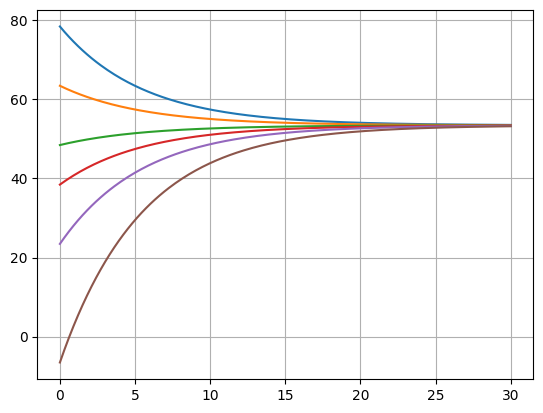

Assíntota horizontal: y = 52


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

g = 9.81
c = 12.5
m = 68.1
dom = np.linspace(0, 30, 200)
plt.plot(dom, (g*m/c+25*np.exp(-c*dom/m)), "-")
plt.plot(dom, (g*m/c+10*np.exp(-c*dom/m)), "-")
plt.plot(dom, (g*m/c-5*np.exp(-c*dom/m)), "-")  #A função plt.plot plota um gráfico com espaçamento definido por dom, que representa o eixo x(tempo) e eixo y(velocidade) dado pela equação (g*m/c-5*np.exp(-c*dom/m))
plt.plot(dom, (g*m/c-15*np.exp(-c*dom/m)), "-")
plt.plot(dom, (g*m/c-30*np.exp(-c*dom/m)), "-")
plt.plot(dom, (g*m/c-60*np.exp(-c*dom/m)), "-")
plt.grid()
plt.show()
print('Assíntota horizontal: y =', '52')

**Interprete aqui o que você encontrou nos gráficos obtidos.**
Os gráficos são gráficos do tipo velocidade x tempo onde os valores de velocidade tendem a 52 quando o tempo tende a infinito. Dessa forma, se a velocidade inicial do paraquedista está acima da velocidade terminal. ela diminuirá, e caso estiver abaixo, ela aumentará.

<br><br>

***
<br><br>

Para obter a solução particular em que $v(0)=0$, fazemos $C_1=-\frac{gm}{c}$ e assim

$$ v(t) = \frac{gm}{c}(1-e^{-\frac cm t}).$$
<br>

Podemos calcular computacionalmente a "prova real" de que essa função é de fato uma solução, calculando $\frac{dv}{dt}$ e confirmando que coincide com $g-\frac{cv}{m}$.

In [ ]:
v1 = (g*m/c)*(1-sp.exp(-c*t/m))  # Define v1 como sendo (g*m/c)*(1-sp.exp(-c*t/m)). Como a exponencial utilizada é sp.exp, essa exponencial não será calculada
v1

                     -0.183553597650514⋅t
53.44488 - 53.44488⋅ℯ                    

In [ ]:
v1.diff(t)   # Deriva v1 em função de t

      -0.183553597650514⋅t
9.81⋅ℯ                    

In [ ]:
sp.simplify(g-c*v1/m) # Simplifica a função g-c*v1/m

      -0.183553597650514⋅t
9.81⋅ℯ                    

Assim, concluímos que de fato a função `v1` é uma solução da equação diferencial.

<br><br>
***
<br><br>

## Método de Euler

Embora para este caso específico a solução exata da equação seja conhecida, podemos obter uma solução aproximada para um conjunto discretos de pontos. Para isso, bastaria usar uma aproximação para a derivada $\frac{dv}{dt}$ através da fórmula de **diferenças finitas** em dois instantes $t_i$ e $t_{i+1}$:

$$ \frac{dv}{dt}(t_i) \approx \frac{v(t_{i+1})-v(t_i)}{t_{i+1}-t_i}.$$

Igualando isso à derivada dada na equação diferencial inicial, temos

$$\frac{v(t_{i+1})-v(t_i)}{t_{i+1}-t_i} \approx g - \frac cm v(t_i),$$  

ou ainda

$$v(t_{i+1}) \approx v(t_i) + \left[ g - \frac cm v(t_i) \right] (t_{i+1}-t_i).$$  

Utilizando uma discretização $\{t_0, \ldots, t_n\}$ uniforme, o comprimento $h=t_{i+1}-t_i$ é chamado de **passo**.

<br><br>

Considerando as constantes que vimos anteriormente, temos

$$v(t_{i+1}) \approx v(t_i) +  \left[ 9,81-0,1835v(t_i) \right] (t_{i+1}-t_i).$$

Ou seja, a partir do valor conhecido $v(t_0)$, no instante $t_0=0$, é possível obter usar essa última equação para obter os valores de $v(t_1), v(t_2), v(t_3),\ldots$ em um conjunto discreto de instantes $t_1, t_2, t_3,\ldots$

<br>

<div class="alert alert-block alert-info">
Em suma, esse é o <b>Método de Euler:</b> mesmo não sabendo a solução exata da EDO, podemos <b>aproximá-la</b> utilizando o método das diferenças finitas e a própria EDO dada.
</div>


### Implementação numérica

<br>

Vamos aproximar a velocidade do paraquedista nos 20 primeiros segundos de queda, ou seja, no intervalo $[0, 20]$. Começamos discretizando esse intervalo em 10 subintervalos (ou seja, o passo aqui seria $h=2$).  

In [ ]:
import numpy as np

ti = np.linspace(0, 20, 10+1)    # discretizando o intervalo
print('Discretização:', ti)

Discretização: [ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20.]


Outra alternativa seria utilizar a função `np.arange`, que permite inserir o passo diretamente. Para calcular o passo a partir do número de subintervalos, basta dividir o comprimento do intervalo pelo número de subintervalos,

$$h=\frac{20-0}{10}=2$$.

In [ ]:
h = (20-0)/10
ti = np.arange(0, 20+h, h)    # pesquise a documentação da função np.arange para entender cada termo
#cria um array onde os valores são adicionados de ordem crescente indo de 0 até 20+h e com um espaçamento entre os valores dado por h
print('Discretização:', ti)

Discretização: [ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20.]


Então calculamos os valores de $v(t_i)$ a partir de $v(t_0)=v(0)=0$ usando a fórmula iterativa

$$v(t_{i+1}) = v(t_i) + \left[ g-\frac{c}{m}v(t_i) \right] (t_{i+1}-t_i)$$

para os valores de $t$ discretizados.

In [ ]:
vi = [0]              # valor inicial de v
for t in ti[:-1]:    # identifique o significado de cada expressão nesse loop
    print ('Instante:', t, 'Valor aproximado de v:', vi[-1])
    v = vi[-1] + (9.81 - (12.5/68.1)*vi[-1])
    vi.append(v)
# enquanto t estiver acessando os valores de ti(discretização), o for vai estar rodando, printando o instante t armazenado dentro de ti e o valor armazenado em vi. A função v = vi[-1] + (9.81 - (12.5/68.1)*vi[-1])*2
#calcula v e vi.append(v) coloca o v calculado na próxima posição em vi. COmo t vai até ti[:-1], significa que ele vai até o penultimo valor de ti.

Instante: 0.0 Valor aproximado de v: 0
Instante: 2.0 Valor aproximado de v: 9.81
Instante: 4.0 Valor aproximado de v: 17.819339207048458
Instante: 6.0 Valor aproximado de v: 24.358535387839858
Instante: 8.0 Valor aproximado de v: 29.697438583904496
Instante: 10.0 Valor aproximado de v: 34.05636689082364
Instante: 12.0 Valor aproximado de v: 37.615198225107115
Instante: 14.0 Valor aproximado de v: 40.52079326455148
Instante: 16.0 Valor aproximado de v: 42.89305588119034
Instante: 18.0 Valor aproximado de v: 44.82988115997332


**Pergunta: Por que faz sentido definirmos $v(t_0)=0$?**

Resposta: Por que em $T_0$ o paraquedista não está em movimento

Agora vamos plotar o gráfico da solução aproximada, obtida discretizando o domínio, e a solução exata para comparação.

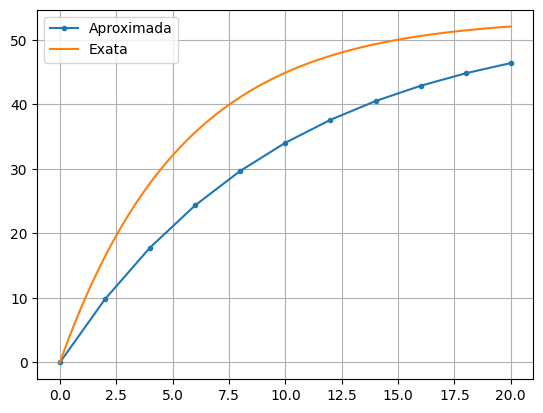

In [ ]:
plt.plot(ti, vi, ".-", label='Aproximada')

dom = np.linspace(0, 20, 100)    # mais pontos para plotar a solução exata
plt.plot(dom, (g*m/c)*(1-np.exp(-c*dom/m)), "-", label='Exata')
plt.grid()
plt.legend()
plt.show()

<br><br>
***
<br><br>

## Exercício 1

Utilize o método de Euler para aproximar a solução da equação diferencial

$$ \frac{dy}{dx} = -2x^3+12x^2-20x+8.5$$

no intervalo entre $x = 0$ a $x = 4$ com um tamanho de passo de $0.5$. A condição inicial em $x = 0$ é $y = 1$.

Resolva a equação analiticamente (note que é uma equação muito simples!) e plote os gráficos da solução exata e da aproximada.

Discretização: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4. ]
Instante: 0.0 Valor aproximado de y: 1
-0.0
0.0
-0.0
Instante: 0.5 Valor aproximado de y: 5.25
-0.25
3.0
-10.0
Instante: 1.0 Valor aproximado de y: 5.875
-2.0
12.0
-20.0
Instante: 1.5 Valor aproximado de y: 5.125
-6.75
27.0
-30.0
Instante: 2.0 Valor aproximado de y: 4.5
-16.0
48.0
-40.0
Instante: 2.5 Valor aproximado de y: 4.75
-31.25
75.0
-50.0
Instante: 3.0 Valor aproximado de y: 5.875
-54.0
108.0
-60.0
Instante: 3.5 Valor aproximado de y: 7.125
-85.75
147.0
-70.0


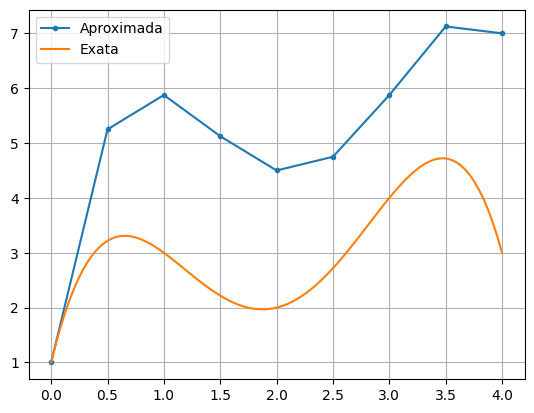

In [ ]:
# resolva o exercício aqui


h = (4-0)/8
xi = np.arange(0, 4+h, h)
print('Discretização:', xi)


yi = [1]
for x in xi[:-1]:
    print ('Instante:', x, 'Valor aproximado de y:', yi[-1])
    y = yi[-1] + (-2*(x**3) + 12*(x**2) - (20*x) + 8.5)*h
    yi.append(y)
    print(-2*x**3)
    print(+12*x**2)
    print(-20*x)
plt.plot(xi, yi, ".-", label='Aproximada')
dom = np.linspace(0, 4, 100)    # mais pontos para plotar a solução exata
plt.plot(dom, -0.5*dom**4+4*dom**3-10*dom**2+8.5*dom+1, "-", label='Exata')
plt.grid()
plt.legend()
plt.show()


<br><br>
***
<br><br>

## Exercício 2

Use o método de Euler para obter três aproximações da solução da equação

$$ \frac{dy}{dx} = x-y+2$$

entre $x = 0$ a $x = 1$, utilizando um passo de $0.25$, $0.2$ e $0.1$, respectivamente. A condição inicial em $x = 0$ é $y = 2$. Plote os gráficos das aproximações.

Discretização: [0.   0.25 0.5  0.75 1.  ]
Instante: 0.0 Valor aproximado de y: 2
Instante: 0.25 Valor aproximado de y: 2.0
Instante: 0.5 Valor aproximado de y: 2.25
Instante: 0.75 Valor aproximado de y: 2.5


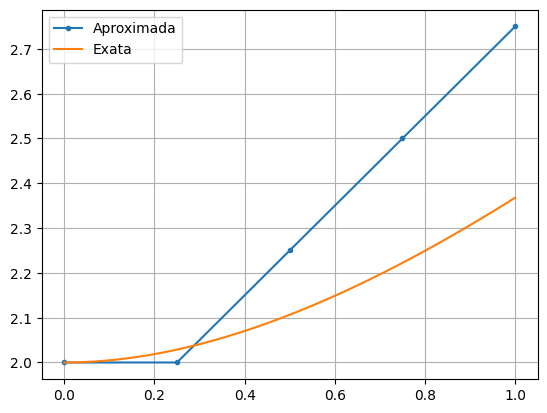

In [9]:
# resolva o exercício aqui

h = (1-0)/4
xi = np.arange(0, 1+h, h)
print('Discretização:', xi)

yi = [2]
for x in xi[:-1]:
    print ('Instante:', x, 'Valor aproximado de y:', yi[-1])
    y = yi[-1] + (x-yi[-1]+2)
    yi.append(y)
plt.plot(xi, yi, ".-", label='Aproximada')
dom = np.linspace(0, 1, 100)    # mais pontos para plotar a solução exata
plt.plot(dom, dom+1+(1/np.exp(dom)), "-", label='Exata')
plt.grid()
plt.legend()
plt.show()


<br><br>
***
<br><br>

## Descreva aqui com suas palavras como funciona o método de Euler:

Complete.